In [38]:
%matplotlib inline  
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [10]:
df = pd.read_csv('../../datasets/Life expectancy.csv')

In [4]:
df.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3253 non-null   object 
 1   Year             3253 non-null   int64  
 2   Life expectancy  3253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.4+ KB


In [6]:
df['Entity'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'India', 'Italy', 'Japan', 'Mexico', 'Russia', 'Spain',
       'Switzerland', 'United Kingdom', 'United States'], dtype=object)

In [17]:
df['Year'].min()

1800

In [18]:
df['Year'].max()

2016

In [13]:
df.describe()

,Year,Life expectancy
count,3253.000000,3253.000000
mean,1908.066093,48.680380
std,62.613962,17.965669
min,1800.000000,8.108836
25%,1854.000000,32.000000
50%,1908.000000,41.880001
75%,1962.000000,66.820000
max,2016.000000,83.940002


In [23]:
df1 = df[df['Entity'] == 'Mexico'].reset_index()
df1

,index,Entity,Year,Life expectancy
0,1951,Mexico,1800,26.900000
1,1952,Mexico,1801,26.900000
2,1953,Mexico,1802,26.900000
3,1954,Mexico,1803,26.900000
4,1955,Mexico,1804,26.900000
...,...,...,...,...
212,2163,Mexico,2012,75.879997
213,2164,Mexico,2013,75.790001
214,2165,Mexico,2014,75.900002
215,2166,Mexico,2015,76.190002


In [34]:
mexico = df[df['Entity'] == 'Mexico'].reset_index(drop=True)
mexico

,Entity,Year,Life expectancy
0,Mexico,1800,26.900000
1,Mexico,1801,26.900000
2,Mexico,1802,26.900000
3,Mexico,1803,26.900000
4,Mexico,1804,26.900000
...,...,...,...
212,Mexico,2012,75.879997
213,Mexico,2013,75.790001
214,Mexico,2014,75.900002
215,Mexico,2015,76.190002


In [25]:
def mymean(xlist):
    media = 0
    for x in xlist:
        media += x
    return media / len(xlist)

lista = [26,25,35,35,35]
mymean(lista)


31.2

In [ ]:
def mean(sample:lista):
    # recives a list an return the mean
    n= len(sample)
    sum_x = sum(sample)
    return sum_x/n

In [26]:
media = mean(df1['Life expectancy'])
media

40.83562865437787

In [30]:
def median(sample:lista):
    """ Función que calcula la mediana """ 
    n = len(sample)
    i = n // 2
    if n % 2 == 1:
        mediana = sorted(sample)[i]
    else:
        mediana = sum(sorted(sample)[i-1 : i+1])/2
    return mediana

In [32]:
lista = [26,25,35,35,35,36]
median(lista)


35.0

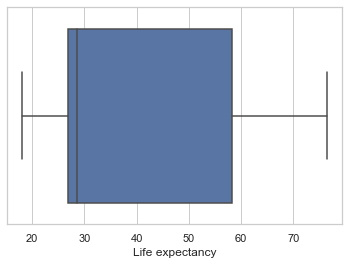

In [39]:
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x = mexico['Life expectancy'])

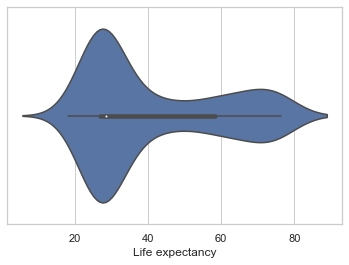

In [66]:
sns.violinplot(x=mexico['Life expectancy']);

# Varianza

In [46]:
def variance(sample:list):
    """ Return the variance"""
    n = len(sample)
    mean = sum(sample)/n
    var = sum((i-mean)**2 for i in sample) / (n-1)
    return var

In [47]:
variance(mexico['Life expectancy'])

333.9730319602118

In [45]:
np.var(mexico['Life expectancy'], ddof=1)

333.9730319602118

In [49]:
mexico_2000 = mexico[mexico['Year'] > 1999].reset_index(drop=True)
mexico_2000

,Entity,Year,Life expectancy
0,Mexico,2000,74.610001
1,Mexico,2001,74.870003
2,Mexico,2002,74.889999
3,Mexico,2003,74.930000
4,Mexico,2004,75.220001
5,Mexico,2005,75.209999
6,Mexico,2006,75.459999
7,Mexico,2007,75.660004
8,Mexico,2008,75.440002
9,Mexico,2009,75.349998


In [51]:
avg = np.mean(mexico_2000['Life expectancy'])
avg

75.46705929411765

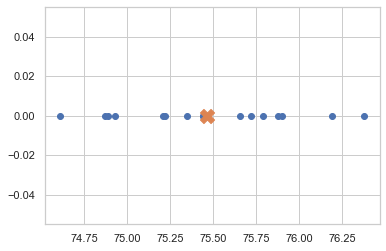

In [65]:
fig, ax = plt.subplots()
plt.scatter(mexico_2000['Life expectancy'], y=np.zeros(len(mexico_2000['Life expectancy'])))
plt.scatter(avg, 0, marker='X', s=200);

In [54]:
np.std(mexico_2000['Life expectancy'])

0.4711905102598255

## Comparación entre dos muestras de una misma población

In [62]:
mexico_80_99 = mexico[(mexico['Year']>1982) & (mexico['Year']< 2000)].reset_index(drop=True)
mexico_80_99

,Entity,Year,Life expectancy
0,Mexico,1983,67.950996
1,Mexico,1984,68.387001
2,Mexico,1985,68.811996
3,Mexico,1986,69.227997
4,Mexico,1987,69.637001
5,Mexico,1988,70.040001
6,Mexico,1989,70.440002
7,Mexico,1990,71.510002
8,Mexico,1991,71.879997
9,Mexico,1992,72.089996


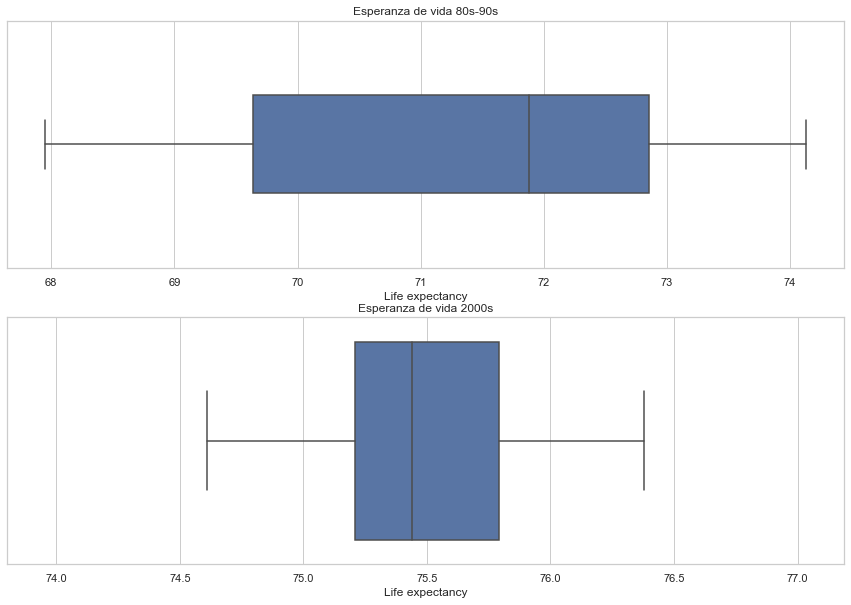

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(x=mexico_80_99['Life expectancy'], ax = axes[0])
axes[0].set_title('Esperanza de vida 80s-90s')
axes[0].axis('equal')

sns.boxplot(x=mexico_2000['Life expectancy'], ax = axes[1])
axes[1].set_title('Esperanza de vida 2000s')
axes[1].axis('equal');



## Comparación entre dos muestras de distintas poblaciones

In [68]:
espana = df[(df['Entity'] == 'Spain') & (df['Year'] >= 1980)].reset_index(drop=True)
espana.head()

,Entity,Year,Life expectancy
0,Spain,1980,75.599998
1,Spain,1981,75.739998
2,Spain,1982,76.300003
3,Spain,1983,76.080002
4,Spain,1984,76.459999


In [69]:
mexico = df[(df['Entity'] == 'Mexico') & (df['Year'] >= 1980)].reset_index(drop=True)
mexico.head()

,Entity,Year,Life expectancy
0,Mexico,1980,66.563004
1,Mexico,1981,67.041000
2,Mexico,1982,67.502998
3,Mexico,1983,67.950996
4,Mexico,1984,68.387001


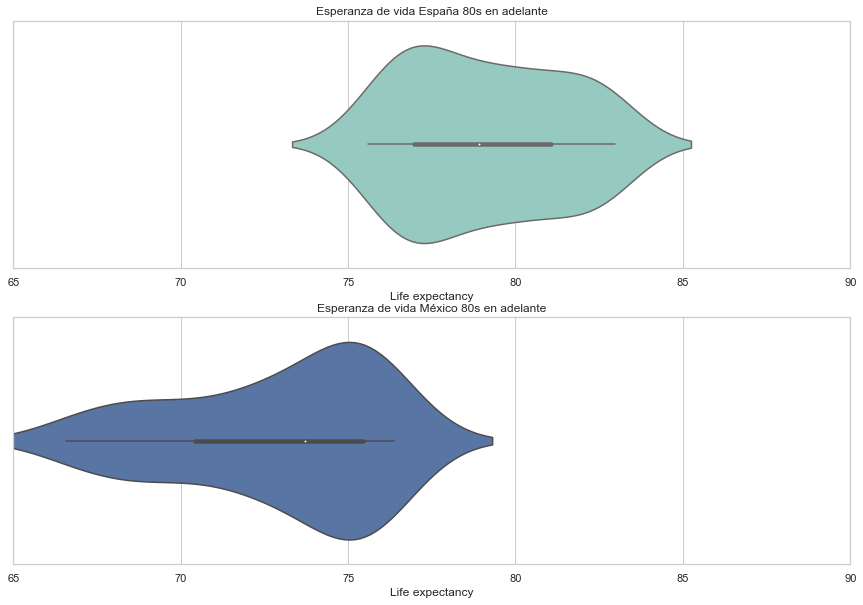

In [74]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))
sns.violinplot(x=espana['Life expectancy'], ax= axes[0], palette='Set3')
axes[0].set_title('Esperanza de vida España 80s en adelante')
axes[0].set_xlim([65, 90])

sns.violinplot(x=mexico['Life expectancy'], ax= axes[1])
axes[1].set_title('Esperanza de vida México 80s en adelante')
axes[1].set_xlim([65, 90]);
